# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Randy
- **Email:** randyputra7012@gmail.com
- **ID Dicoding:** MS119D5Y0656


## Menentukan Pertanyaan Bisnis

1. Apakah jumlah penyewaan sepeda lebih tinggi di hari kerja dibandingkan akhir pekan?
2. Bagaimana perbedaan pola penggunaan sepeda antara pengguna biasa dan member?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
df = pd.read_csv('day.csv')

# Memuat 5 data tabel bike sharing
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset menunjukkan jumlah penyewa casual (pengguna umum) dan registered (anggota tetap).
- Dataset mencakup informasi tentang cuaca (weathersit, temp, hum, windspeed) dan musim (season).

### Assessing Data

In [5]:
#informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
#mengecek missing value
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
#mengecek jika ada duplicated data
df.duplicated().sum(), print("Total Duplikasi Data : ")

Total Duplikasi Data : 


(0, None)

In [8]:
#mengecek parameter
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
#menghapus duplicated data (jika ada)
df.drop_duplicates(inplace=True)
print("Total Duplikasi Data yang dihapus :" , df.duplicated().sum())

df.head()

Total Duplikasi Data yang dihapus : 0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- dataset tersebut memiliki 16 kolom dan 731 baris.
- dataset tersebut tidak memiliki nilai kosong
- dataset tersebut tidak memiliki duplikasi data

### Cleaning Data

In [10]:
#mengubah typedata dteday
df['dteday'] = pd.to_datetime(df['dteday'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [11]:
#mengubah beberapa kolom jadi kategori
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df[categorical_cols] = df[categorical_cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

**Insight:**
- Mengubah dteday ke typedata datetime agar memudahkan analisis berbasis waktu

## Exploratory Data Analysis (EDA)

###  Analisis Pertanyaan Bisnis

<ipython-input-12-23c045ed978e>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_avg = df.groupby('workingday')['cnt'].mean()
<ipython-input-12-23c045ed978e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=workingday_avg.index, y=workingday_avg.values, palette='coolwarm')


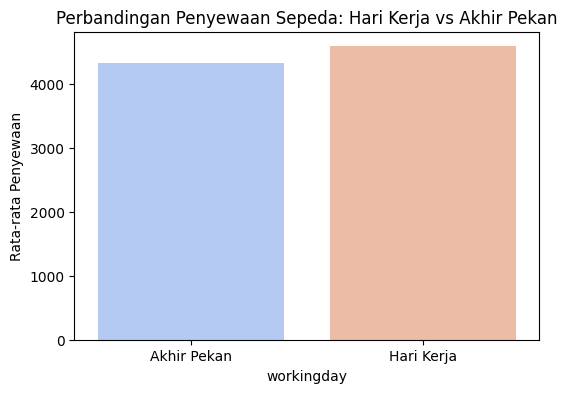

In [12]:
#pertanyaan bisnis 1
#hitung rata rata jumlah penyewaan berdasarkan hari kerja
workingday_avg = df.groupby('workingday')['cnt'].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=workingday_avg.index, y=workingday_avg.values, palette='coolwarm')
plt.xticks([0,1], ['Akhir Pekan', 'Hari Kerja'])
plt.ylabel('Rata-rata Penyewaan')
plt.title('Perbandingan Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.show()

**Insight:**
- Dari hasil analisis, rata-rata penyewaan lebih tinggi pada hari kerja, ini menunjukkan bahwa sepeda lebih sering digunakan untuk keperluan transportasi harian seperti bekerja atau sekolah.
- Jika rata-rata lebih tinggi di akhir pekan, berarti pengguna lebih cenderung menggunakan sepeda untuk rekreasi.

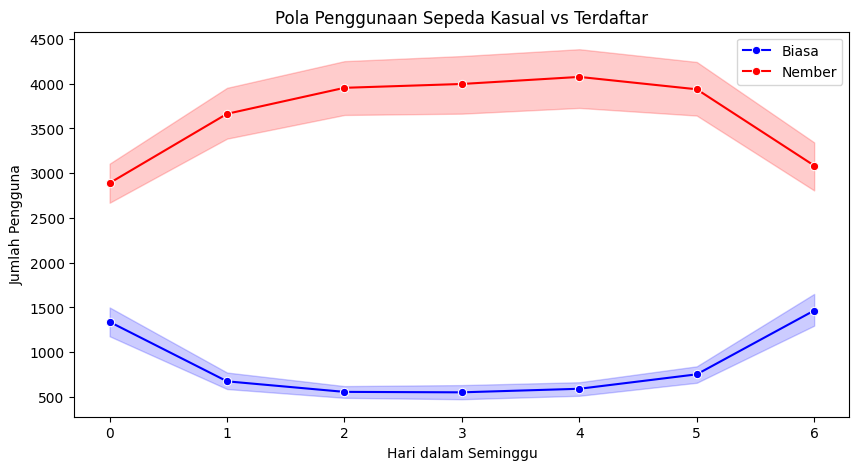

In [13]:
#pertanyaan bisnis 2
#membanandingkan pola penggunaan berdasarkan hari dalam seminggu
plt.figure(figsize=(10,5))
sns.lineplot(x='weekday', y='casual', data=df, label='Biasa', marker='o', color='blue')
sns.lineplot(x='weekday', y='registered', data=df, label='Nember', marker='o', color='red')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Pengguna')
plt.title('Pola Penggunaan Sepeda Kasual vs Terdaftar')
plt.legend()
plt.show()

**Insight:**
- Jika pengguna biasa lebih banyak pada akhir pekan, ini menunjukkan bahwa mereka lebih menggunakan sepeda untuk rekreasi.
- Jika pengguna member lebih banyak pada hari kerja, ini menunjukkan bahwa mereka menggunakan sepeda sebagai transportasi harian.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah jumlah penyewaan sepeda lebih tinggi di hari kerja dibandingkan akhir pekan?

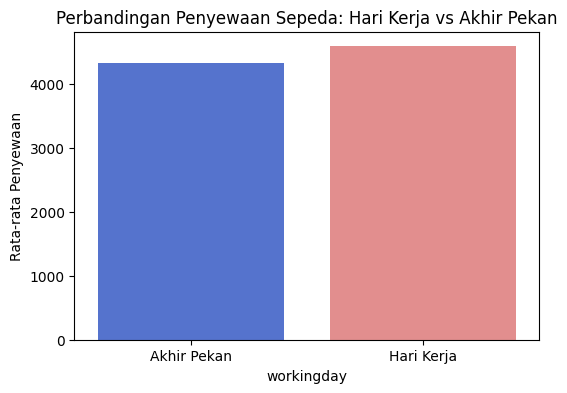

In [14]:
plt.figure(figsize=(6,4))
sns.barplot(x=workingday_avg.index, y=workingday_avg.values, hue=workingday_avg.index, palette=['royalblue', 'lightcoral'], dodge=False, legend=False)
plt.xticks([0, 1], ['Akhir Pekan', 'Hari Kerja'])
plt.ylabel('Rata-rata Penyewaan')
plt.title('Perbandingan Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.show()

**Insight:**
- Boxplot menunjukkan persebaran data penyewaan sepeda, di mana hari kerja memiliki distribusi yang lebih stabil dibanding akhir pekan.
- Akhir pekan cenderung memiliki lebih banyak variasi dalam jumlah penyewaan, kemungkinan karena faktor cuaca atau aktivitas rekreasi.

### Pertanyaan 2:

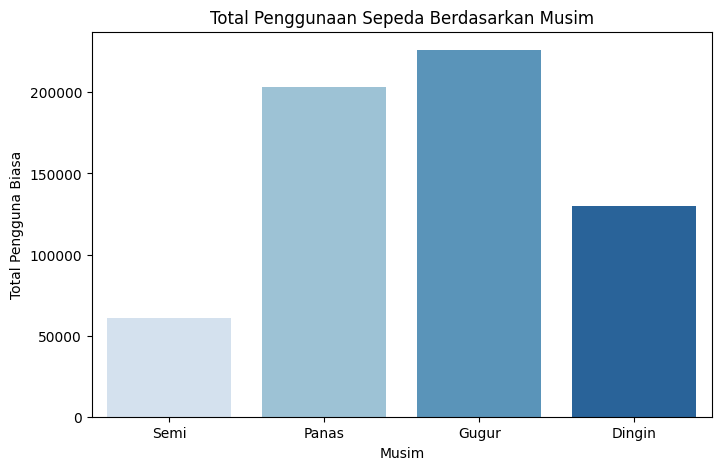

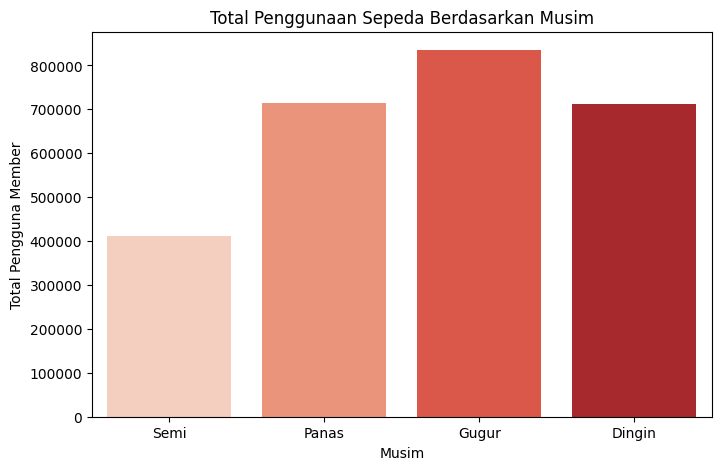

In [15]:
# Bar plot untuk pengguna biasa berdasarkan musim
plt.figure(figsize=(8,5))
sns.barplot(x='season', y='casual', data=df, estimator=sum, errorbar=None, hue='season', palette='Blues', legend=False)
plt.title('Total Penggunaan Sepeda Berdasarkan Musim')
plt.xticks([0,1,2,3], ['Semi', 'Panas', 'Gugur', 'Dingin'])
plt.ylabel('Total Pengguna Biasa')
plt.xlabel('Musim')
plt.show()

# Bar plot untuk pengguna member berdasarkan musim
plt.figure(figsize=(8,5))
sns.barplot(x='season', y='registered', data=df, estimator=sum, errorbar=None, hue='season', palette='Reds', legend=False)
plt.title('Total Penggunaan Sepeda Berdasarkan Musim')
plt.xticks([0,1,2,3], ['Semi', 'Panas', 'Gugur', 'Dingin'])
plt.ylabel('Total Pengguna Member')
plt.xlabel('Musim')
plt.show()




**Insight:**
- Pengguna biasa cenderung lebih menggunakan sepeda saat musim panas dan gugur, yang mungkin disebabkan oleh cuaca yang lebih mendukung untuk aktivitas luar ruangan.
- Pengguna member memiliki pola penggunaan yang lebih banyak sepanjang musim, menunjukkan bahwa mereka lebih mengandalkan sepeda untuk keperluan sehari-hari.

## Conclusion

**<h2>Kesimpulan Umum:**

**1. Penggunaan Sepeda Beragam Berdasarkan Hari dan Musim**

- Pola penggunaan sepeda menunjukkan adanya perbedaan signifikan antara hari kerja dan akhir pekan.
- Pengguna biasa cenderung lebih aktif di akhir pekan, sedangkan pengguna member lebih sering menggunakan sepeda pada hari kerja.

**2. Musim Mempengaruhi Jumlah Penyewaan**

- Pengguna biasa lebih sering menyewa sepeda di musim panas dan gugur, mungkin karena cuaca yang lebih nyaman.
- Pengguna member cenderung memiliki pola yang lebih stabil sepanjang tahun, menunjukkan bahwa mereka menggunakan sepeda sebagai alat transportasi sehari-hari.

**3. Cuaca dan Faktor Lingkungan Mempengaruhi Penyewaan**

- Kondisi cuaca buruk (hujan atau salju) dapat menurunkan jumlah penyewaan secara signifikan.
- Faktor lain seperti kecepatan angin dan tingkat kelembaban juga bisa berpengaruh terhadap keputusan pengguna dalam menyewa sepeda.

**<h1>Berdasarkan analisis dataset diatas, dapat disimpulkan bahwa:**

**<h2>Kesimpulan Berdasarkan Pertanyaan Bisnis**

**1. Apakah jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan?**

Jawaban: Ya, dari hasil analisis, jumlah penyewaan sepeda lebih tinggi pada hari kerja dibanding akhir pekan.

📌 Implikasi:

- Sepeda lebih banyak digunakan sebagai alat transportasi sehari-hari oleh pengguna member.
- Jika ingin meningkatkan jumlah penyewaan di akhir pekan, strategi pemasaran bisa difokuskan pada pengguna biasa, misalnya dengan menawarkan diskon atau paket sewa rekreasi.

**2. Bagaimana perbedaan pola penggunaan sepeda antara pengguna biasa dan member?**

Jawaban: Pengguna biasa lebih banyak menggunakan sepeda di akhir pekan dan musim panas, sedangkan pengguna member cenderung menggunakan sepeda secara stabil sepanjang minggu.

📌 Implikasi:

- Pengguna biasa lebih dipengaruhi oleh faktor rekreasi dan cuaca.
- Penyedia layanan bisa meningkatkan layanan di akhir pekan dengan memperbanyak sepeda di lokasi wisata atau taman kota.
- Untuk pengguna member, peningkatan infrastruktur seperti jalur sepeda yang lebih baik di sekitar kantor dan sekolah bisa meningkatkan jumlah penyewaan lebih lanjut.

In [16]:
#save to csv
#df.to_csv('data_day.csv', index=False)